In [18]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
import csv

In [70]:
file = open("DSI_kickstarterscrape_dataset.csv", encoding='cp437')

In [71]:
#First, lets read the file
csvFile = pd.read_csv(file) 

In [72]:
#Lets look at the table
csvFile

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00


In [22]:
csvFile["pledged"].mean()

4980.749678963979

In [23]:
csvFile["backers"].mean()

69.97319233196248

In [24]:
csvFile["backers"].max()

87142

In [25]:
#The mean is 70 and the max is 87000 so we need to take out outliers based on standard deviation.
h=sorted(csvFile["backers"])
standardDeviation=np.std(h+[-a for a in h])
#I took out anything past 2* the standard deviation, hoping that's enough
out_threshold= 2.0*standardDeviation
h=[i for i in h if i<out_threshold]
standardDeviation = np.std(h)
backersData = np.array(h)

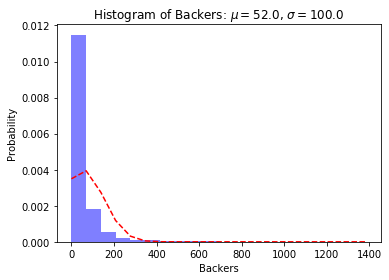

In [26]:
mu = backersData.mean() # mean of distribution
sigma = standardDeviation # standard deviation of distribution
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(backersData, num_bins, density=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Backers')
plt.ylabel('Probability')
plt.title(r'Histogram of Backers: $\mu='+str(round(mu))+'$, $\sigma='+str(round(sigma))+'$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

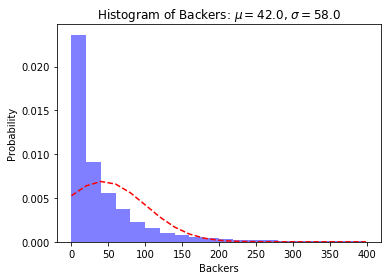

In [27]:
#Outliers still have an effect. I need to adjust this just so we can see a cleaner histogram.
#I am simply setting it to 400 based on the histogram above.
h=[i for i in h if i<400]
standardDeviation = np.std(h)
backersData = np.array(h)

mu = backersData.mean() # mean of distribution
sigma = standardDeviation # standard deviation of distribution
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(backersData, num_bins, density=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Backers')
plt.ylabel('Probability')
plt.title(r'Histogram of Backers: $\mu='+str(round(mu))+'$, $\sigma='+str(round(sigma))+'$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

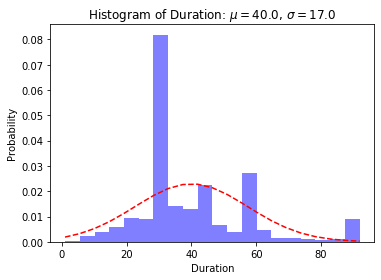

In [28]:
#Lets do a histogram with duration to check if its normal (it isnt)
h=sorted(csvFile["duration"])
h=[i for i in h if i<400]
durationData = np.array(h)
mu = durationData.mean()  # mean of distribution
sigma = np.std(durationData) # standard deviation of distribution
num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(durationData, num_bins, density=1, facecolor='blue', alpha=0.5)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Duration')
plt.ylabel('Probability')
plt.title(r'Histogram of Duration: $\mu='+str(round(mu))+'$, $\sigma='+str(round(sigma))+'$')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [31]:
subcategorMean = csvFile.groupby("subcategory")["pledged"].mean()

In [33]:
subcategorMean

subcategory
Animation                  4572.743529
Art                        3017.993494
Art Book                   3571.952802
Board & Card Games        10460.702703
Board &amp; Card Games    13675.056561
Children's Book            2478.551302
Classical Music            3617.885892
Comics                     5065.365079
Conceptual Art             2041.595506
Country & Folk             3946.572000
Country &amp; Folk         4030.596535
Crafts                     1643.243137
Dance                      2626.772668
Design                     8467.761404
Digital Art                2105.479167
Documentary                6566.068561
Electronic Music           2648.350993
Fashion                    2546.425176
Fiction                    1596.509554
Film &amp; Video           3827.679230
Food                       5165.242530
Games                      5531.091241
Graphic Design             3744.577143
Hip-Hop                    1671.157233
Illustration               3343.116505
Indie Rock   

In [59]:
categoryMean = csvFile.groupby("category")["pledged"].mean()

In [60]:
categoryMean

category
Art                  2712.840431
Comics               5065.365079
Dance                2626.772668
Design              20021.925779
Fashion              2546.425176
Film & Video         5163.861446
Film &amp; Video     4750.919764
Food                 5165.242530
Games               15239.981567
Music                3666.751764
Photography          2564.081902
Publishing           2398.671069
Technology          13623.771323
Theater              3025.339486
Name: pledged, dtype: float64

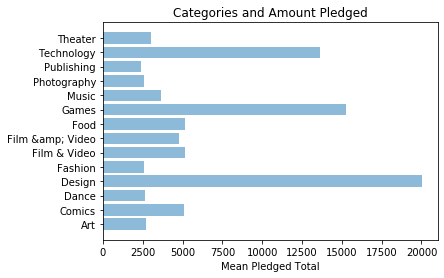

In [61]:
#Category is easier to work with and it represents the subcategories pretty well with no outliers. Lets bar chart
#It out and see what categories are the best in terms of amount pledged.
y_pos = np.arange(len(categoryMean))

plt.barh(y_pos, categoryMean, align='center', alpha=0.5)
plt.yticks(y_pos, categoryMean.index)
plt.xlabel('Mean Pledged Total')
plt.title('Categories and Amount Pledged')

plt.show()

In [62]:
#How about we also do it for the percentage of goal and check if that fits?
fundedMean = csvFile.groupby("category")["funded percentage"].mean()
fundedMean

category
Art                 3.678950
Comics              2.045597
Dance               1.019342
Design              3.262921
Fashion             1.034475
Film & Video        0.696748
Film &amp; Video    2.558498
Food                0.979268
Games               1.345840
Music               1.217785
Photography         0.669175
Publishing          0.941844
Technology          1.053424
Theater             1.318760
Name: funded percentage, dtype: float64

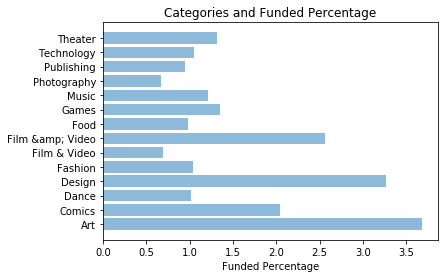

In [64]:
y_pos = np.arange(len(fundedMean))

plt.barh(y_pos, fundedMean, align='center', alpha=0.5)
plt.yticks(y_pos, fundedMean.index)
plt.xlabel('Funded Percentage')
plt.title('Categories and Funded Percentage')

plt.show()

In [73]:
#I just noticed Film & Video has mismatching text and needs some cleaning
csvFile["category"] = csvFile["category"].replace("Film &amp; Video","Film & Video")

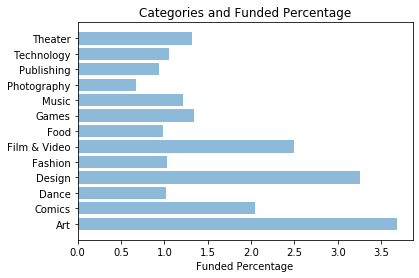

In [75]:
fundedMean = csvFile.groupby("category")["funded percentage"].mean()
y_pos = np.arange(len(fundedMean))

plt.barh(y_pos, fundedMean, align='center', alpha=0.5)
plt.yticks(y_pos, fundedMean.index)
plt.xlabel('Funded Percentage')
plt.title('Categories and Funded Percentage')

plt.show()

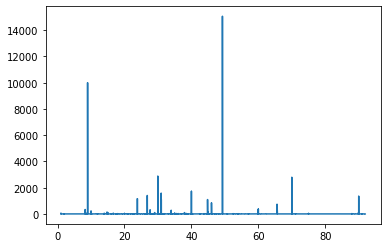

In [92]:
sort_by_duration = csvFile.sort_values('duration')

plt.plot(sort_by_duration["duration"], sort_by_duration["funded percentage"])
plt.show()

In [93]:
#We are affected by outliers again. We need to limit the funded percentage by 5
sort_by_duration = sort_by_duration.loc[sort_by_duration["funded percentage"] < 5]

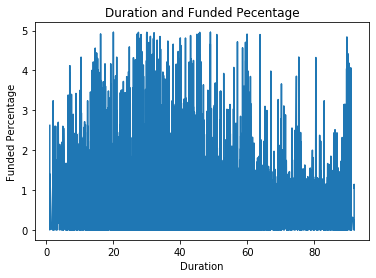

In [95]:
plt.plot(sort_by_duration["duration"], sort_by_duration["funded percentage"])
plt.ylabel('Funded Percentage')
plt.xlabel('Duration')
plt.title('Duration and Funded Pecentage')
plt.show()

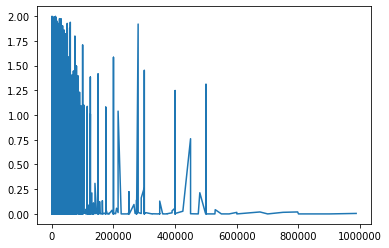

In [101]:
sort_by_goal = csvFile.sort_values('goal')
#dealing with outliers again
sort_by_goal = sort_by_goal.loc[sort_by_goal["funded percentage"] < 2]
sort_by_goal = sort_by_goal.loc[sort_by_goal["goal"] < 999999]

plt.plot(sort_by_goal["goal"], sort_by_goal["funded percentage"])
plt.show()

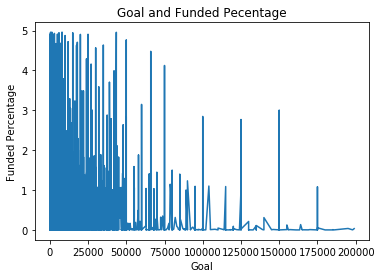

In [103]:
sort_by_goal = csvFile.sort_values('goal')
#dealing with outliers again
sort_by_goal = sort_by_goal.loc[sort_by_goal["funded percentage"] < 5]
sort_by_goal = sort_by_goal.loc[sort_by_goal["goal"] < 200000]

plt.plot(sort_by_goal["goal"], sort_by_goal["funded percentage"])
plt.ylabel('Funded Percentage')
plt.xlabel('Goal')
plt.title('Goal and Funded Pecentage')
plt.show()